In [1]:
import pandas as pd
import re
import numpy as np
import glob
from Bio import SeqIO
import os
from collections import defaultdict
import networkx
from networkx.algorithms.components.connected import connected_components

# Comparing BGC diversity to the PoDP BGCs

## - Inputs

In [2]:
bigscape_dict2_path = '/Volumes/TFL210426/backup_repos/NPOmix_colaborations/alana/main_code_results_B81_npomix2/bigscape_dict2-NPOmix1.0-20220226.txt'
antismash_folder_path = '/Volumes/TFL210426/NPOmix_colabA/antismash/B81/'
edges_path = "/Volumes/TFL210426/NPOmix_colabA/gnps/162d018009d44416bb147f892ed152b9..selfloop"
nodes_path = "/Volumes/TFL210426/NPOmix_colabA/gnps/865df79e68fb4fdfb1941b0127f9978c.clustersummary"

## - Getting the GCF and the MF dictionaries

In [3]:
bigscape_dict = pd.read_csv(bigscape_dict2_path,names=['gcf','bgcs'])

bigscape_dict

,gcf,bgcs
0,GCF1,"['GCA_000316115.region010', 'ISB8A.region002']"
1,GCF2,"['ISB8A.region003', 'GCA_000316115.region011']"
2,GCF3,"['ISB8A.region004', 'GCA_000316115.region012']"
3,GCF4,"['ISB8A.region006', 'GCA_000316115.region003']"
4,GCF5,"['GCA_000316115.region004', 'ISB8A.region008']"
...,...,...
1024,GCF1025,"['ERR3946798.region008', 'ERR3941315.region015']"
1025,GCF1026,"['ERR3941231.region010', 'ERR3946820.region011']"
1026,GCF1027,"['ERR3941200.region011', 'ERR3946851.region013']"
1027,GCF1028,"['ERR3946770.region007', 'ERR3941157.region006']"


In [4]:
edges_df = pd.read_csv(edges_path,sep='\t')

def get_neighbors(target,dataframe,column1,column2):
    subset1 = dataframe[(dataframe[column1]==target)]
    subcat = subset1.append(dataframe[(dataframe[column2]==target)])
    temp_list = []
    for index,row in subcat.iterrows():
        temp_list.append(subcat[column1][index])
        temp_list.append(subcat[column2][index])
    temp_list = list(np.unique(temp_list))
    return temp_list

def to_edges(l):
    it = iter(l)
    last = next(it)
    for current in it:
        yield last, current
        last = current

def to_graph(l):
    G = networkx.Graph()
    for part in l:
        G.add_nodes_from(part)
        G.add_edges_from(to_edges(part))
    return G

def get_family_dict(components_list,dataframe,dictionary,column1,column2,column3):
    count = 0
    for family in list(components_list):
        count += 1
        for fam_member in family:
            dictionary['MF%s'%count].append(fam_member)
    return dictionary

def main_get_families(gnps_df):
    targets_list = np.unique([gnps_df.CLUSTERID1,gnps_df.CLUSTERID2])
    neighbors_list = []
    for target in targets_list:
        neighbors_list.append(get_neighbors(target,gnps_df,'CLUSTERID1','CLUSTERID2'))
    G = to_graph(neighbors_list)
    C = connected_components(G)
    mf_dict = defaultdict(list)
    mf_dict = get_family_dict(C,gnps_df,mf_dict,'CLUSTERID1','CLUSTERID2','Cosine')
    return mf_dict

mf_dict = main_get_families(edges_df)

mf_dict

defaultdict(list,
            {'MF1': [2],
             'MF2': [4],
             'MF3': [17632,
              5633,
              13377,
              6,
              3882,
              11,
              2053486,
              5619,
              3860,
              81781,
              6420,
              61398,
              17624,
              4061,
              61439],
             'MF4': [35],
             'MF5': [734],
             'MF6': [741],
             'MF7': [742],
             'MF8': [745, 3859, 5143, 3351],
             'MF9': [1149],
             'MF10': [3315, 14780],
             'MF11': [3339],
             'MF12': [5176, 3393],
             'MF13': [3691],
             'MF14': [3699],
             'MF15': [7384, 7388, 7389, 3807],
             'MF16': [3980],
             'MF17': [4602],
             'MF18': [25603, 15460, 15428, 5006, 15423],
             'MF19': [5157],
             'MF20': [5192, 5178, 5292],
             'MF21': [5217],
             'MF22': 

In [5]:
nodes_df = pd.read_csv(nodes_path,sep='\t')

nodes_df

,AllGroups,DefaultGroups,EvenOdd,G1,G2,G3,G4,G5,G6,GNPSLinkout_Cluster,...,SpectrumID,UniqueFileSources,UniqueFileSourcesCount,cluster index,componentindex,number of spectra,parent mass,precursor charge,precursor mass,sum(precursor intensity)
0,,G1,1,8,0,0,0,0,0,https://gnps.ucsd.edu//ProteoSAFe/result.jsp?t...,...,NaN,Bact_vulg_CL09T03C04_V1.3.mzXML|SspCM7v1.2.mzX...,7,2,-1,8,84.043,0,84.043,12004.0
1,,G1,1,14,0,0,0,0,0,https://gnps.ucsd.edu//ProteoSAFe/result.jsp?t...,...,NaN,Bact_dore_CL02T00C15_V1.3.mzXML|Bacteroides_sp...,12,4,-1,14,84.043,0,84.043,23389.0
2,,G1,1,20,0,0,0,0,0,https://gnps.ucsd.edu//ProteoSAFe/result.jsp?t...,...,NaN,Bact_vulg_CL09T03C04_V1.3.mzXML|SspCM7v1.2.mzX...,12,6,1245,20,84.044,0,84.044,46212.0
3,,G1,1,16,0,0,0,0,0,https://gnps.ucsd.edu//ProteoSAFe/result.jsp?t...,...,NaN,Bact_vulg_CL09T03C04_V1.3.mzXML|Acti_vis_C505_...,13,11,1245,16,84.043,0,84.043,37704.0
4,,G1,1,6,0,0,0,0,0,https://gnps.ucsd.edu//ProteoSAFe/result.jsp?t...,...,NaN,Bact_sp_1_1_6_V2.3.mzXML|Bacteroides_sp_1_1_30...,4,35,-1,6,84.043,0,84.043,12097.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40196,,G1,0,14,0,0,0,0,0,https://gnps.ucsd.edu//ProteoSAFe/result.jsp?t...,...,CCMSLIB00000478630,GCA_001562525.2.mzXML|GCA_001562525.1.mzXML,2,2584493,587,14,1776.850,0,1776.850,0.0
40197,,G1,1,5,0,0,0,0,0,https://gnps.ucsd.edu//ProteoSAFe/result.jsp?t...,...,NaN,CP024894.2.mzML|CP024894.5.mzML|CP024894.1.mzM...,5,2584502,6316,5,1801.710,0,1801.710,116168.0
40198,,G1,0,6,0,0,0,0,0,https://gnps.ucsd.edu//ProteoSAFe/result.jsp?t...,...,NaN,CP024894.2.mzML|CP024894.5.mzML|CP024894.1.mzM...,5,2584505,6316,6,1808.720,0,1808.720,125070.0
40199,,G1,0,6,0,0,0,0,0,https://gnps.ucsd.edu//ProteoSAFe/result.jsp?t...,...,NaN,GCA_000507825.1.mzXML|2537561577.1.mzXML|25633...,4,2584509,-1,6,1816.740,0,1816.740,24008.0


# MF beta-diversity

In [6]:
seen = []
mf_dict2 = {}

for key in mf_dict:
    new_mf_list = []
    for metabolite in mf_dict[key]:
        index_nodes = nodes_df[nodes_df['cluster index'] == metabolite].index[0]
        sample_list = nodes_df.loc[index_nodes]['UniqueFileSources']
        for strain in sample_list.split('|'):
            new_name = '%s.region%s'%(str(strain).split('.')[0],metabolite)
            if new_name not in seen:
                seen.append(new_name)
                new_mf_list.append(new_name)
    mf_dict2[key] = new_mf_list
                
mf_dict2

{'MF1': ['Bact_vulg_CL09T03C04_V1.region2',
  'SspCM7v1.region2',
  'Clos_clos_2_1_49FAA_V1.region2',
  'Blongum44Bv1.region2',
  'Clos_orbi_1_3_50AFAA_V1.region2',
  'Bact_sp_9_1_42FAA_V2.region2',
  'SspSR1v1.region2'],
 'MF2': ['Bact_dore_CL02T00C15_V1.region4',
  'Bacteroides_sp_1_1_30_V1.region4',
  'Bact_frag_CL07T12C05_V1.region4',
  'SspCM6v1.region4',
  'SspOBRC6v1.region4',
  'Blongum44Bv1.region4',
  'Bact_cacc_CL03T12C61_V1.region4',
  'Para_merd_CL03T12C32_V1.region4',
  'Clos_orbi_1_3_50AFAA_V1.region4',
  'Bact_sp_9_1_42FAA_V2.region4',
  'Clos_bact_OBRC5-5_V1.region4',
  'SspSR1v1.region4'],
 'MF3': ['Bact_vulg_CL09T03C04_V1.region17632',
  'Acti_vis_C505_V3.region17632',
  'Bact_dore_CL02T00C15_V1.region17632',
  'SspCM7v1.region17632',
  'Bacteroides_sp_1_1_30_V1.region17632',
  'Blongum44Bv1.region17632',
  'Bact_ster_CC31F_V1.region17632',
  'BspMSTE12v1.region17632',
  'Bact_cell_CL02T12C19_V1.region17632',
  'SspBS29av1.region17632',
  'Blongum35Bv1.region17632',


In [7]:
cluster_list = []
strains = []

for item in mf_dict2.values():
    cluster_list = cluster_list + item

for item in cluster_list:
    strains.append(item.split('.')[0])

col_names = list(np.unique(strains))

# col_names.remove('')

col_names

['2513237359',
 '2513237364',
 '2513237391',
 '2515154094',
 '2515154124',
 '2515154136',
 '2515154177',
 '2515154206',
 '2516143022',
 '2516493032',
 '2517287023',
 '2517434008',
 '2517572145',
 '2517572157',
 '2517572165',
 '2517572194',
 '2518285535',
 '2518285561',
 '2518285562',
 '2518285564',
 '2519103067',
 '2519103070',
 '2519103116',
 '2524023211',
 '2524023247',
 '2524614807',
 '2528311034',
 '2528311045',
 '2529292840',
 '2529292847',
 '2529292952',
 '2529292986',
 '2529292987',
 '2529293058',
 '2529293221',
 '2529293225',
 '2529293274',
 '2529293277',
 '2531839107',
 '2531839114',
 '2531839191',
 '2531839222',
 '2531839223',
 '2531839225',
 '2531839226',
 '2531839301',
 '2531839303',
 '2531839304',
 '2531839305',
 '2531839306',
 '2531839307',
 '2531839315',
 '2531839319',
 '2531839320',
 '2531839324',
 '2531839421',
 '2531839422',
 '2531839423',
 '2531839424',
 '2531839425',
 '2531839426',
 '2531839427',
 '2531839428',
 '2531839429',
 '2531839430',
 '2531839495',
 '25318394

In [8]:
family_rows = []
indexes = []

for key,value in mf_dict2.items():
    indexes.append(key)
    row = []
    for strain in col_names:
        find_substring_in_list = [s for s in value if strain.lower() in s.lower()] # .lower() for case insensitive
        sublist = filter(lambda x: strain in x, value)
        sublist = list(sublist)
        if find_substring_in_list:
            row.append(1)
        else:
            row.append(0)
    family_rows.append(row)
    
mf_patterns = pd.DataFrame(family_rows,columns=col_names,index=indexes)

In [9]:
mf_patterns

,2513237359,2513237364,2513237391,2515154094,2515154124,2515154136,2515154177,2515154206,2516143022,2516493032,...,SspCM7v1,SspOBRC6v1,SspSR1v1,StaphepE13Av01,Stre_inte_F0413_V1,Stre_para_CC87K_V1,Stre_sang_CC94A_V1,Trep_dent_ASLM_V1,Trep_dent_US-Trep_V1,VspACP1v1
MF1,0,0,0,0,0,0,0,0,0,0,...,1,0,1,0,0,0,0,0,0,0
MF2,0,0,0,0,0,0,0,0,0,0,...,0,1,1,0,0,0,0,0,0,0
MF3,0,0,0,0,0,0,0,0,0,0,...,1,1,1,0,0,0,0,0,0,0
MF4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
MF5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MF18330,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
MF18331,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
MF18332,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
MF18333,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
from scipy.spatial import distance
from scipy.cluster import hierarchy
import seaborn as sns
from skbio.diversity import beta_diversity
import matplotlib.pyplot as plt
sns.set()
%matplotlib inline

header = list(mf_patterns.columns.values)

ids = mf_patterns.columns.astype(str).tolist()
data = mf_patterns[col_names].values
data = data.transpose()
data = data.astype(int)

bc_dm = beta_diversity('jaccard', data, ids)
bc_dm_df = bc_dm.to_data_frame()

/Users/tiagoferreiraleao/anaconda3/lib/python3.7/site-packages/sklearn/metrics/pairwise.py:1765: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)


In [11]:
diversity_scores = {}

for i,r in bc_dm_df.iterrows():
    diversity_scores[i] = np.average(bc_dm_df[i]),np.std(bc_dm_df[i])

most_promising_color = {}
col1,col2 = [],[]

for key,value in diversity_scores.items():
    col1.append(key)
    col2.append(value[0])
    if 'B81' == key:
        most_promising_color[key] = {"diversity":"new_producer", "subject":"Query sample"}
    else:
        if value[0] >= 0.95:
            most_promising_color[key] = {"diversity":"rare_producer", "subject":"High diversity (avg. ≥ 95%)"}
        else:
            most_promising_color[key] = {"diversity":"common_producer", "subject":"Low diversity (avg. < 95%)"}
            
sample_md = pd.DataFrame.from_dict(most_promising_color, orient='index')

sample_md

,diversity,subject
2513237359,common_producer,Low diversity (avg. < 95%)
2513237364,common_producer,Low diversity (avg. < 95%)
2513237391,common_producer,Low diversity (avg. < 95%)
2515154094,rare_producer,High diversity (avg. ≥ 95%)
2515154124,rare_producer,High diversity (avg. ≥ 95%)
...,...,...
Stre_para_CC87K_V1,common_producer,Low diversity (avg. < 95%)
Stre_sang_CC94A_V1,common_producer,Low diversity (avg. < 95%)
Trep_dent_ASLM_V1,common_producer,Low diversity (avg. < 95%)
Trep_dent_US-Trep_V1,common_producer,Low diversity (avg. < 95%)


In [12]:
frames = {'strain':col1,'bd_meta':col2}

final_diversity_df = pd.DataFrame(frames)

final_diversity_df

,strain,bd_meta
0,2513237359,0.891396
1,2513237364,0.893660
2,2513237391,0.914653
3,2515154094,0.985513
4,2515154124,0.989779
...,...,...
1634,Stre_para_CC87K_V1,0.948707
1635,Stre_sang_CC94A_V1,0.943656
1636,Trep_dent_ASLM_V1,0.945834
1637,Trep_dent_US-Trep_V1,0.948071


# GCF beta-diversity

In [13]:
gcf_dict = {}

for i,r in bigscape_dict.iterrows():
    bgc_list = []
    for bgc in r['bgcs'].split(','):
        bgc_list.append(bgc.lstrip('[').lstrip(' ').replace('\'','').rstrip(']'))
    gcf_dict[r['gcf']] = bgc_list
    
gcf_dict

{'GCF1': ['GCA_000316115.region010', 'ISB8A.region002'],
 'GCF2': ['ISB8A.region003', 'GCA_000316115.region011'],
 'GCF3': ['ISB8A.region004', 'GCA_000316115.region012'],
 'GCF4': ['ISB8A.region006', 'GCA_000316115.region003'],
 'GCF5': ['GCA_000316115.region004', 'ISB8A.region008'],
 'GCF6': ['GCA_000316115.region005', 'ISB8A.region009'],
 'GCF7': ['GCA_000316115.region006', 'ISB8A.region010'],
 'GCF8': ['GCA_000316115.region008', 'ISB8A.region013'],
 'GCF9': ['BGC0001837.1',
  'ISB8A.region014',
  'GCA_000316115.region002',
  'BGC0001350.1'],
 'GCF10': ['GCA_000316115.region001', 'ISB8A.region015'],
 'GCF11': ['GCA_002994615.region022',
  'GCA_000170895.region002',
  'GCA_000737335.region031',
  'GCA_002994635.region018'],
 'GCF12': ['BGC0000844.1',
  'DS570624.region002',
  'BGC0000845.1',
  'BGC0000319.1'],
 'GCF13': ['BGC0000373.1', 'DS570624.region019'],
 'GCF14': ['BGC0000940.1',
  'BGC0001478.1',
  '2518285535.region018',
  'GCA_000377525.region018',
  'NC_020990.region021',
  

In [14]:
cluster_list = []
strains = []

for item in gcf_dict.values():
    cluster_list = cluster_list + item

for item in cluster_list:
    if 'BGC' in item[:3]:
        strains.append('MIBiG')
    else:
        strains.append(item.split('.')[0])

col_names = list(np.unique(strains))

col_names

['2515154094',
 '2515154124',
 '2515154177',
 '2515154206',
 '2516143022',
 '2516493032',
 '2517434008',
 '2517572145',
 '2517572157',
 '2517572165',
 '2517572194',
 '2518285535',
 '2518285561',
 '2518285562',
 '2518285564',
 '2519103067',
 '2519103070',
 '2524614807',
 '2528311034',
 '2528311045',
 '2529292840',
 '2529292847',
 '2529292952',
 '2529292986',
 '2529293274',
 '2529293277',
 '2531839107',
 '2531839114',
 '2531839222',
 '2531839223',
 '2531839225',
 '2531839226',
 '2531839315',
 '2531839319',
 '2531839320',
 '2531839324',
 '2531839421',
 '2531839422',
 '2531839423',
 '2531839424',
 '2531839425',
 '2531839426',
 '2531839427',
 '2531839428',
 '2531839429',
 '2531839430',
 '2534681797',
 '2534681798',
 '2534682005',
 '2537561578',
 '2537561580',
 '2537561581',
 '2537561582',
 '2537561583',
 '2537561586',
 '2537561671',
 '2537561673',
 '2537561674',
 '2537561675',
 '2537561676',
 '2537561677',
 '2537561678',
 '2537561681',
 '2537561682',
 '2537561743',
 '2537561815',
 '25375618

In [15]:
family_rows = []
indexes = []

for key,value in gcf_dict.items():
    indexes.append(key)
    row = []
    for strain in col_names:
        if strain == "MIBiG":
            find_substring_in_list = [s for s in value if "BGC" in s]
            sublist = filter(lambda x: "BGC" in x, value)
            sublist = list(sublist)
        else:
            find_substring_in_list = [s for s in value if strain.lower() in s.lower()] # .lower() for case insensitive
            sublist = filter(lambda x: strain in x, value)
            sublist = list(sublist)
            for item in find_substring_in_list:
                if 'BGC' in item[:3]:
                    find_substring_in_list.remove(item)
                    sublist.remove(item)
        if find_substring_in_list:
            row.append(1)
        else:
            row.append(0)
    family_rows.append(row)
    
gcf_patterns = pd.DataFrame(family_rows,columns=col_names,index=indexes)

gcf_patterns

,2515154094,2515154124,2515154177,2515154206,2516143022,2516493032,2517434008,2517572145,2517572157,2517572165,...,SspCM6v1,SspCM7v1,SspOBRC6v1,SspSR1v1,Stre_inte_F0413_V1,Stre_para_CC87K_V1,Stre_sang_CC94A_V1,Trep_dent_ASLM_V1,Trep_dent_US-Trep_V1,VspACP1v1
GCF1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
GCF2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
GCF3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
GCF4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
GCF5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GCF1025,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
GCF1026,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
GCF1027,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
GCF1028,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [16]:
from scipy.spatial import distance
from scipy.cluster import hierarchy
import seaborn as sns
from skbio.diversity import beta_diversity
import matplotlib.pyplot as plt
sns.set()
%matplotlib inline

header = list(gcf_patterns.columns.values)

ids = gcf_patterns.columns.astype(str).tolist()
data = gcf_patterns[col_names].values
data = data.transpose()
data = data.astype(int)

bc_dm2 = beta_diversity('jaccard', data, ids)
bc_dm_df2 = bc_dm2.to_data_frame()

/Users/tiagoferreiraleao/anaconda3/lib/python3.7/site-packages/sklearn/metrics/pairwise.py:1765: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)


In [17]:
diversity_scores2 = {}

for i,r in bc_dm_df2.iterrows():
    diversity_scores2[i] = np.average(bc_dm_df2[i]),np.std(bc_dm_df2[i])

most_promising_color2 = {}
bd_gcf_dict = {}

for key,value in diversity_scores2.items():
    bd_gcf_dict[key] = value[0]
    if 'B81' == key:
        most_promising_color2[key] = {"diversity":"new_producer", "subject":"Query sample"}
    else:
        if value[0] >= 0.98:
            most_promising_color2[key] = {"diversity":"rare_producer", "subject":"High diversity (avg. ≥ 95%)"}
        else:
            most_promising_color2[key] = {"diversity":"common_producer", "subject":"Low diversity (avg. < 95%)"}
            
sample_md2 = pd.DataFrame.from_dict(most_promising_color2, orient='index')

sample_md2

,diversity,subject
2515154094,rare_producer,High diversity (avg. ≥ 95%)
2515154124,rare_producer,High diversity (avg. ≥ 95%)
2515154177,rare_producer,High diversity (avg. ≥ 95%)
2515154206,rare_producer,High diversity (avg. ≥ 95%)
2516143022,rare_producer,High diversity (avg. ≥ 95%)
...,...,...
Stre_para_CC87K_V1,rare_producer,High diversity (avg. ≥ 95%)
Stre_sang_CC94A_V1,rare_producer,High diversity (avg. ≥ 95%)
Trep_dent_ASLM_V1,rare_producer,High diversity (avg. ≥ 95%)
Trep_dent_US-Trep_V1,rare_producer,High diversity (avg. ≥ 95%)


In [18]:
col3 = []

for i,r in final_diversity_df.iterrows():
    if r['strain'] in bd_gcf_dict:
        col3.append(bd_gcf_dict[r['strain']])
    else:
        col3.append('missing')
        
final_diversity_df['bd_gen'] = col3

final_diversity_df = final_diversity_df[final_diversity_df['bd_gen'] != 'missing']

final_diversity_df = final_diversity_df.sort_values(by='bd_meta')

final_diversity_df = final_diversity_df.reset_index(drop=True)

final_diversity_df

,strain,bd_meta,bd_gen
0,2531839319,0.887337,0.967367
1,GCA_000145355,0.887337,0.975434
2,2531839422,0.887961,0.977339
3,GCA_000144085,0.887961,0.977339
4,648276711,0.888598,0.997479
...,...,...,...
396,GCA_001942475,0.998439,0.993676
397,GCA_001942495,0.998591,0.994707
398,GCA_011290345,0.998633,0.989798
399,2724679019,0.999040,0.99236


In [19]:
final_diversity_df[final_diversity_df['strain'] == 'B81']

,strain,bd_meta,bd_gen
332,B81,0.988012,0.992354


<AxesSubplot:>

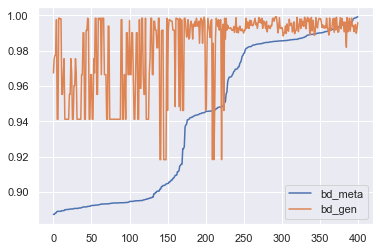

In [20]:
final_diversity_df.plot()

In [23]:
final_diversity_df.to_csv('./final_diversity_df-220625.csv')

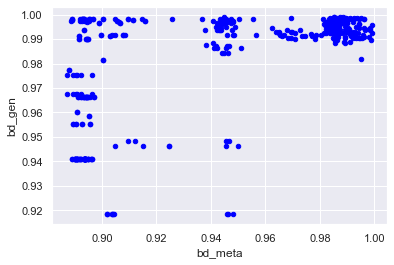

In [24]:
ax1 = final_diversity_df.plot.scatter(x='bd_meta',y='bd_gen',c='Blue')